In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import joblib

In [42]:
data = pd.read_csv('data.csv')
data

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Population, total",SP.POP.TOTL,Turkiye,TUR,65425961.0,66245128.0,67048795.0,67831730.0,68592617.0,69329557.0,...,77181884.0,78218479.0,79277962.0,80312698.0,81407204.0,82579440.0,83384680.0,84147318.0,84979913.0,85325965.0
1,Urban population,SP.URB.TOTL,Turkiye,TUR,42357421.0,43284567.0,44234772.0,45177289.0,46111387.0,47033171.0,...,56402205.0,57577405.0,58771924.0,59948610.0,61171815.0,62454830.0,63459911.0,64430760.0,65453229.0,66096052.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Last Updated: 03/24/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
data.dropna(inplace=True)
data

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Population, total",SP.POP.TOTL,Turkiye,TUR,65425961.0,66245128.0,67048795.0,67831730.0,68592617.0,69329557.0,...,77181884.0,78218479.0,79277962.0,80312698.0,81407204.0,82579440.0,83384680.0,84147318.0,84979913.0,85325965.0
1,Urban population,SP.URB.TOTL,Turkiye,TUR,42357421.0,43284567.0,44234772.0,45177289.0,46111387.0,47033171.0,...,56402205.0,57577405.0,58771924.0,59948610.0,61171815.0,62454830.0,63459911.0,64430760.0,65453229.0,66096052.0


In [ ]:
data.drop(index=1, inplace=True)

In [45]:
data

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Population, total",SP.POP.TOTL,Turkiye,TUR,65425961.0,66245128.0,67048795.0,67831730.0,68592617.0,69329557.0,...,77181884.0,78218479.0,79277962.0,80312698.0,81407204.0,82579440.0,83384680.0,84147318.0,84979913.0,85325965.0


In [46]:
data.drop(columns=['Series Name', 'Series Code', 'Country Name', 'Country Code'], inplace=True)
data

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,65425961.0,66245128.0,67048795.0,67831730.0,68592617.0,69329557.0,70045349.0,70158112.0,71051678.0,72039206.0,...,77181884.0,78218479.0,79277962.0,80312698.0,81407204.0,82579440.0,83384680.0,84147318.0,84979913.0,85325965.0


In [51]:
long_data = pd.melt(data, var_name='Year', value_name='Value')

# Extract just the numeric year from the 'Year' column.
long_data['Year'] = long_data['Year'].str.extract(r'(\d{4})').astype(int)

# Display the transformed data
print(long_data.head())

   Year       Value
0  2000  65425961.0
1  2001  66245128.0
2  2002  67048795.0
3  2003  67831730.0
4  2004  68592617.0


In [53]:
long_data.sort_values(by='Year', inplace=True)
long_data.reset_index(drop=True, inplace=True)
long_data

,Year,Value
0,2000,65425961.0
1,2001,66245128.0
2,2002,67048795.0
3,2003,67831730.0
4,2004,68592617.0
5,2005,69329557.0
6,2006,70045349.0
7,2007,70158112.0
8,2008,71051678.0
9,2009,72039206.0


In [55]:
X = long_data[['Year']]  
y = long_data['Value'] 

In [70]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [71]:
print("\nLinear Regression Model:")
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)


Linear Regression Model:
Coefficient (slope): 907862.4026086956
Intercept: -1751028851.7640579


In [72]:
# Predict values for the years in the data and add as a new column in the long DataFrame
long_data['Predicted'] = model.predict(X)

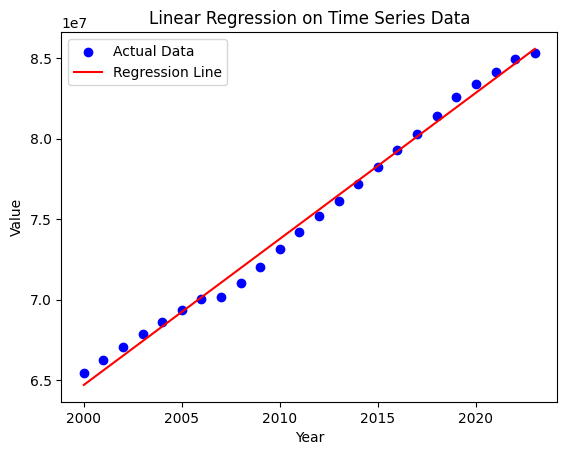

In [73]:
# Step 5: Visualize the actual data and the regression line
plt.scatter(long_data['Year'], long_data['Value'], label='Actual Data', color='blue')
plt.plot(long_data['Year'], long_data['Predicted'], label='Regression Line', color='red')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Linear Regression on Time Series Data')
plt.legend()
plt.show()

In [74]:
future_years = pd.DataFrame({'Year': np.arange(2024, 2029)})
future_predictions = model.predict(future_years)
future_years['Predicted_Value'] = future_predictions / 1e6

print("\nFuture Predictions:")
print(future_years)


Future Predictions:
   Year  Predicted_Value
0  2024        86.484651
1  2025        87.392514
2  2026        88.300376
3  2027        89.208238
4  2028        90.116101


In [76]:
joblib.dump(model, 'linear_model.pkl')

['linear_model.pkl']